## Visualising time series of counted cyclists

> https://github.com/aodhanlutetiae/bikecounter

In [40]:
# show current working directory

!ls

bicycle_counter.py    LICENSE               video_files
bicycle_log_viz.ipynb README.md             yolov8n.pt
bicycle_log.csv       requirements.txt


In [41]:
# import libraries and data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bicycle_log.csv')

In [42]:
# examine data

print(df.sample(4))
print('')
df.info()

    bicycle_id             timestamp_frame
13          98  2025-08-15T09:53:47.467200
3           12  2025-08-15T09:53:16.847246
17         123  2025-08-15T09:53:52.695691
7           79  2025-08-15T09:53:39.244161

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bicycle_id       21 non-null     int64 
 1   timestamp_frame  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [43]:
# create new column with adjusted time data type
df['timest'] = pd.to_datetime(df["timestamp_frame"])

# remove original timestamp column
df = df[['bicycle_id', 'timest']]

# groupby minutes with a count in new df
cpm = df.groupby(df["timest"].dt.floor("min")).size().reset_index(name="count")

In [46]:
cpm

,timest,count,time_label
0,2025-08-15 09:53:00,19,09:53
1,2025-08-15 09:54:00,2,09:54


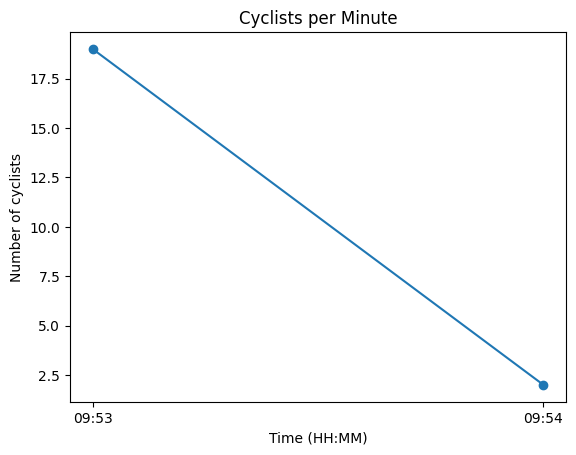

In [45]:
# visualise

# Format times for the x-axis
cpm["time_label"] = cpm["timest"].dt.strftime("%H:%M")

# plt.bar(cpm["time_label"], cpm["count"])
plt.plot(cpm["time_label"], cpm["count"], marker="o")
plt.xlabel("Time (HH:MM)")
plt.ylabel("Number of cyclists")
plt.title("Cyclists per Minute")
plt.show()